In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder


In [2]:
# Load the Breast Cancer Wisconsin dataset from Kaggle
url = "https://www.kaggle.com/uciml/breast-cancer-wisconsin-data"

In [3]:
#a).Loading the data
dataset_url = ('C:/Users/ADMIN/downloads/simon/breast cancer dataa.csv')
df = pd.read_csv('C:/Users/ADMIN/downloads/breast cancer.csv')

# Display the first few rows of the dataset
print(df.head())


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
#b). Display the data frame information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
#c). Display the first and last tuples of the data set
print("First tuples:")
print(df.head(1))
print("\nLast tuples:")
print(df.tail(1))


First tuples:
       id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0  842302         M        17.99         10.38           122.8     1001.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0           0.1184            0.2776          0.3001               0.1471   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33            184.6      2019.0            0.1622   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   

   fractal_dimension_worst  Unnamed: 32  
0                   0.1189          NaN  

[1 rows x 33 columns]

Last tuples:
        id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
568  92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
568          0.

In [8]:
#d) Display the descriptive statistics
print(df.describe())


                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

In [9]:
#e). Display the class label distribution
print(df['diagnosis'].value_counts())


B    357
M    212
Name: diagnosis, dtype: int64


<Axes: xlabel='diagnosis', ylabel='count'>

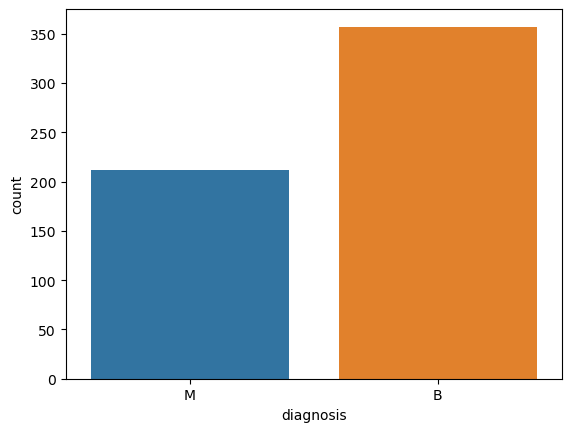

In [10]:
#f). Use seaborn to display a count plot for the class label
sns.countplot(x='diagnosis', data=df)


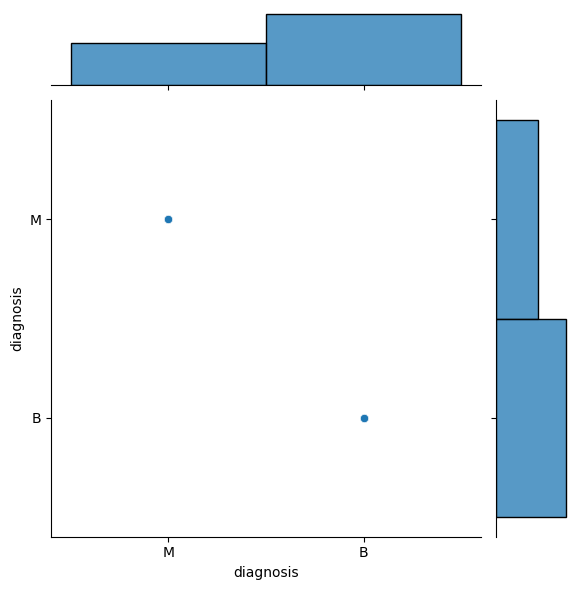

In [11]:
#g). Use seaborn to display a joint plot with any two variables of your choice
sns.jointplot(x='diagnosis', y='diagnosis', data=df)
plt.show()

In [2]:
# i)Split the data into features (X) and labels (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

NameError: name 'df' is not defined

In [1]:
#Split the data into training and testing sets (75% training, 25% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


NameError: name 'X' is not defined

In [15]:
# j)Display the shape of the training and test sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (426, 32) (426,)
Test set shape: (143, 32) (143,)


Training Accuracy: 0.9859154929577465
Testing Accuracy: 0.958041958041958


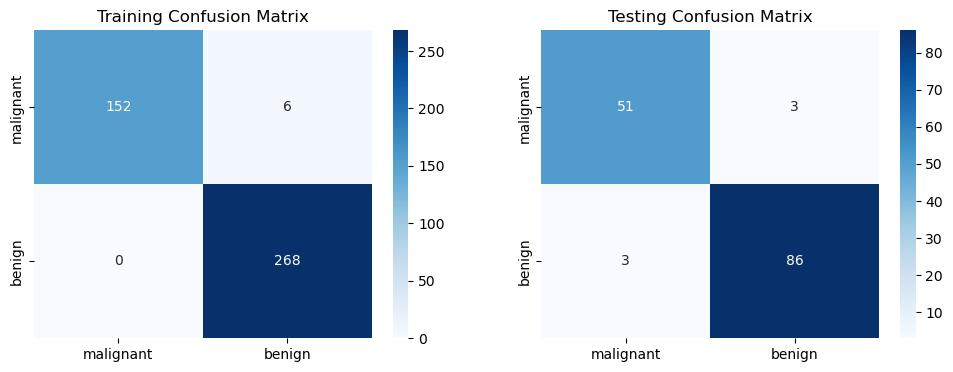

In [16]:
# TO TRAIN A MODEL USING K-NN
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Introduce NaN values 
import numpy as np
np.random.seed(42)
X[np.random.choice(X.shape[0], size=30), np.random.choice(X.shape[1], size=30)] = np.nan

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the K-NN model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = knn_model.predict(X_train_scaled)
y_test_pred = knn_model.predict(X_test_scaled)

# Evaluation metrics
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Display results
print("Training Accuracy:", accuracy_train)
print("Testing Accuracy:", accuracy_test)

# Display confusion matrices using seaborn
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Training Confusion Matrix")

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Testing Confusion Matrix")

plt.show()


Training Confusion Matrix (K-NN):
[[152   6]
 [  0 268]]


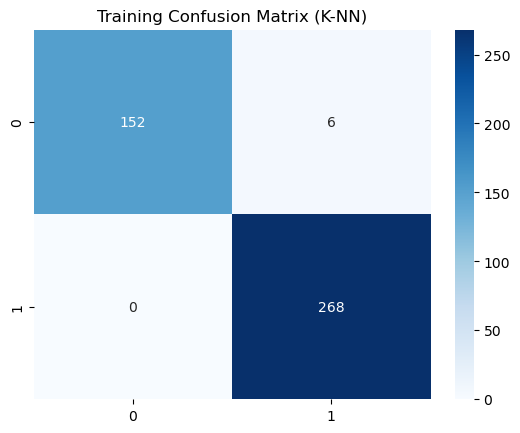

Training Classification Accuracy (K-NN): 0.9859154929577465

Testing Confusion Matrix (K-NN):
[[51  3]
 [ 3 86]]


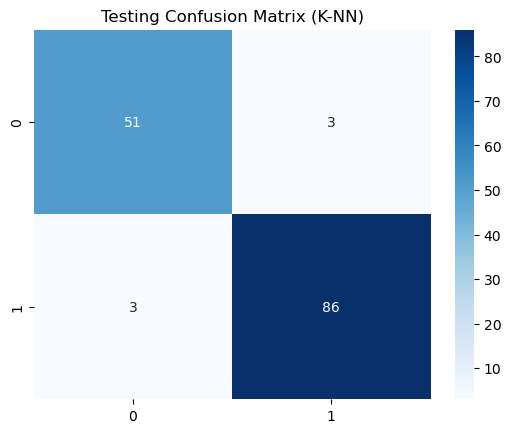

Testing Classification Accuracy (K-NN): 0.958041958041958

Comparison of Training and Testing Accuracy (K-NN):
Training Accuracy: 0.9859154929577465
Testing Accuracy: 0.958041958041958


In [17]:
# k) Train a model using K-Nearest Neighbor (K-NN)
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train K-NN model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred_knn = knn_model.predict(X_train_scaled)
y_test_pred_knn = knn_model.predict(X_test_scaled)

# Evaluation metrics
conf_matrix_train_knn = confusion_matrix(y_train, y_train_pred_knn)
conf_matrix_test_knn = confusion_matrix(y_test, y_test_pred_knn)

accuracy_train_knn = accuracy_score(y_train, y_train_pred_knn)
accuracy_test_knn = accuracy_score(y_test, y_test_pred_knn)

# Display results
print("Training Confusion Matrix (K-NN):")
print(conf_matrix_train_knn)
sns.heatmap(conf_matrix_train_knn, annot=True, fmt='d', cmap='Blues')
plt.title("Training Confusion Matrix (K-NN)")
plt.show()
print("Training Classification Accuracy (K-NN):", accuracy_train_knn)

print("\nTesting Confusion Matrix (K-NN):")
print(conf_matrix_test_knn)
sns.heatmap(conf_matrix_test_knn, annot=True, fmt='d', cmap='Blues')
plt.title("Testing Confusion Matrix (K-NN)")
plt.show()
print("Testing Classification Accuracy (K-NN):", accuracy_test_knn)

# Compare the training and testing accuracy
print("\nComparison of Training and Testing Accuracy (K-NN):")
print("Training Accuracy:", accuracy_train_knn)
print("Testing Accuracy:", accuracy_test_knn)

Training Accuracy (SVM): 0.9906103286384976
Testing Accuracy (SVM): 0.965034965034965


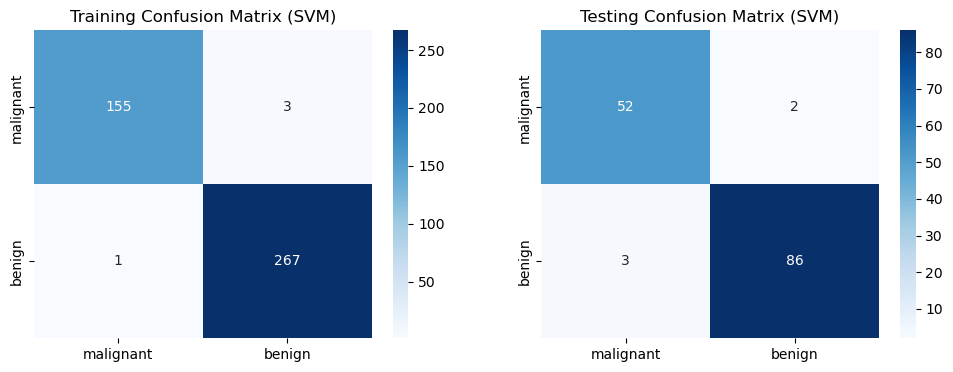

In [18]:
# I)TRAIN A MODEL USING SVM
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the breast cancer dataset (if not already loaded)
# data = load_breast_cancer()
# X = data.data
# y = data.target

# Assuming X and y are already loaded and processed

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred_svm = svm_model.predict(X_train_scaled)
y_test_pred_svm = svm_model.predict(X_test_scaled)

# Evaluation metrics
accuracy_train_svm = accuracy_score(y_train, y_train_pred_svm)
accuracy_test_svm = accuracy_score(y_test, y_test_pred_svm)

conf_matrix_train_svm = confusion_matrix(y_train, y_train_pred_svm)
conf_matrix_test_svm = confusion_matrix(y_test, y_test_pred_svm)

# Display results
print("Training Accuracy (SVM):", accuracy_train_svm)
print("Testing Accuracy (SVM):", accuracy_test_svm)

# Display confusion matrices using seaborn
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train_svm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Training Confusion Matrix (SVM)")

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test_svm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Testing Confusion Matrix (SVM)")

plt.show()

Training Accuracy (Decision Tree): 1.0
Testing Accuracy (Decision Tree): 0.951048951048951


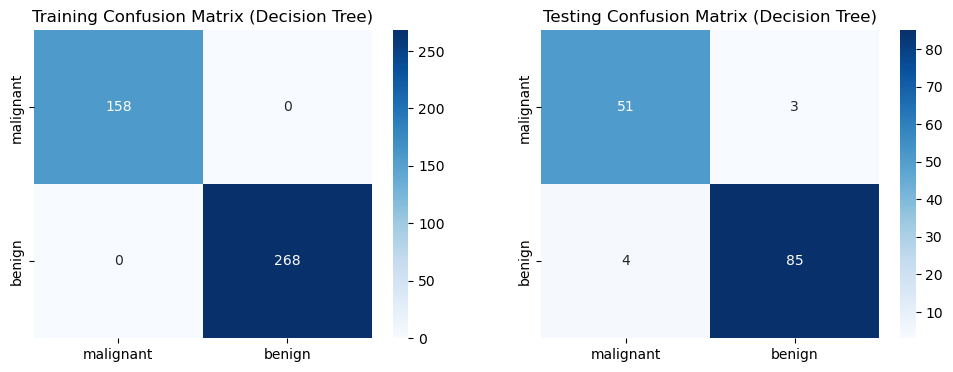

In [19]:
# m)TRAIN A MODEL USING DECISION TREE
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X and y are already loaded and processed

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_train_pred_dt = dt_model.predict(X_train)
y_test_pred_dt = dt_model.predict(X_test)

# Evaluation metrics
accuracy_train_dt = accuracy_score(y_train, y_train_pred_dt)
accuracy_test_dt = accuracy_score(y_test, y_test_pred_dt)

conf_matrix_train_dt = confusion_matrix(y_train, y_train_pred_dt)
conf_matrix_test_dt = confusion_matrix(y_test, y_test_pred_dt)

# Display results
print("Training Accuracy (Decision Tree):", accuracy_train_dt)
print("Testing Accuracy (Decision Tree):", accuracy_test_dt)

# Display confusion matrices using seaborn
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train_dt, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Training Confusion Matrix (Decision Tree)")

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test_dt, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Testing Confusion Matrix (Decision Tree)")

plt.show()

Training Accuracy (Random Forest): 1.0
Testing Accuracy (Random Forest): 0.965034965034965


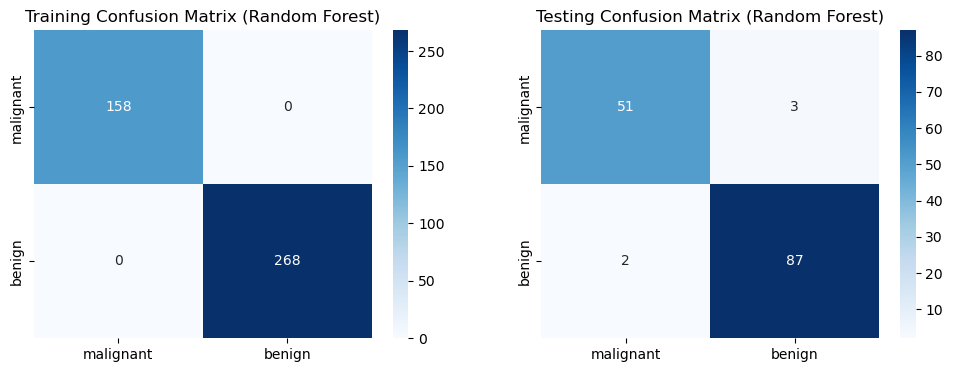

In [20]:
# n)TRAIN A MODEL USING RANDOM FOREST
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X and y are already loaded and processed

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Evaluation metrics
accuracy_train_rf = accuracy_score(y_train, y_train_pred_rf)
accuracy_test_rf = accuracy_score(y_test, y_test_pred_rf)

conf_matrix_train_rf = confusion_matrix(y_train, y_train_pred_rf)
conf_matrix_test_rf = confusion_matrix(y_test, y_test_pred_rf)

# Display results
print("Training Accuracy (Random Forest):", accuracy_train_rf)
print("Testing Accuracy (Random Forest):", accuracy_test_rf)

# Display confusion matrices using seaborn
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train_rf, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Training Confusion Matrix (Random Forest)")

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test_rf, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Testing Confusion Matrix (Random Forest)")

plt.show()

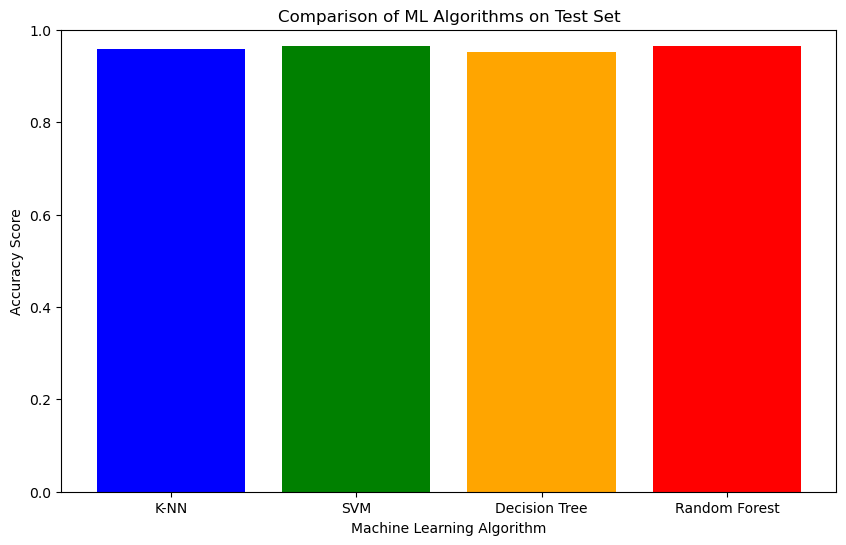

In [21]:
#o)demonstrating by way of a plot the ML algorithm which performs better from the results above.
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# List of algorithms and their accuracies
algorithms = ['K-NN', 'SVM', 'Decision Tree', 'Random Forest']
accuracies = [accuracy_test_knn, accuracy_test_svm, accuracy_test_dt, accuracy_test_rf]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Machine Learning Algorithm')
plt.ylabel('Accuracy Score')
plt.title('Comparison of ML Algorithms on Test Set')
plt.ylim([0, 1])  # Set the y-axis limit between 0 and 1 for better visualization
plt.show()
